# Resampling

The amount of noise in the data requires the use of a smoothing process to reduce interference. A method to reduce high-frequency noise is resampling. Resampling methods refer to the process
of changing the frequency of some data to produce a data set with a different cadence. The data set analyzed has several RSSI values for each second. However, this granularity is not necessary for localization purposes since people cannot completely change position in such a short time. Therefore, we can reduce some of the interference by lowering the frequency of each measurement.

## Downsampling

The process of decreasing the frequency of a time series is called downsampling. Two main aspects are fundamental in this process: the frequency to which resample the data and the summary
statistics to group the data, i.e., an aggregate function.

First of all let's read the cleaned data obtained in the data preparation phase.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df = pd.read_csv('../dataset/clean_data_1.csv')

Then we need the set the time index that will be used by the resample function.

In [2]:
df['Time'] = df['Time'].apply(pd.Timestamp)

### Frequency
The first decision is the resolution of the resample, i.e., the new frequency of the measurements.
Since the data set contains RSSI values from a smartphone carried by someone, an interval of few seconds might be suitable. We will try with a one second frequency and a two seconds frequency

### Aggregation function
The second decision regards the aggregation function. There are different options like sum, mean, median, but in the context of indoor localization mean and median seem the most appropriate.

#### One second frequency 
Line 1 shows the resampling method to produce a new time series with a one-second frequency. The RSSI value of each is computed taking the means over each second interval.

In [20]:
mean_df = df.resample('0.25S', on='Time').mean()

mean_df

,rssi
Time,
2022-09-04 08:39:30.000,-62.100000
2022-09-04 08:39:30.250,-62.000000
2022-09-04 08:39:30.500,-63.285714
2022-09-04 08:39:30.750,-62.666667
2022-09-04 08:39:31.000,-62.888889
...,...
2022-09-04 08:39:49.000,-61.000000
2022-09-04 08:39:49.250,-60.500000
2022-09-04 08:39:49.500,-60.444444


It is interesting to notice that the number of rows is reduced from 13.584 to 1201, showing that the initial data set contains an average of 11 RSSI values for each second.

<AxesSubplot:title={'center':'Resample 1 second using mean'}, xlabel='Time'>

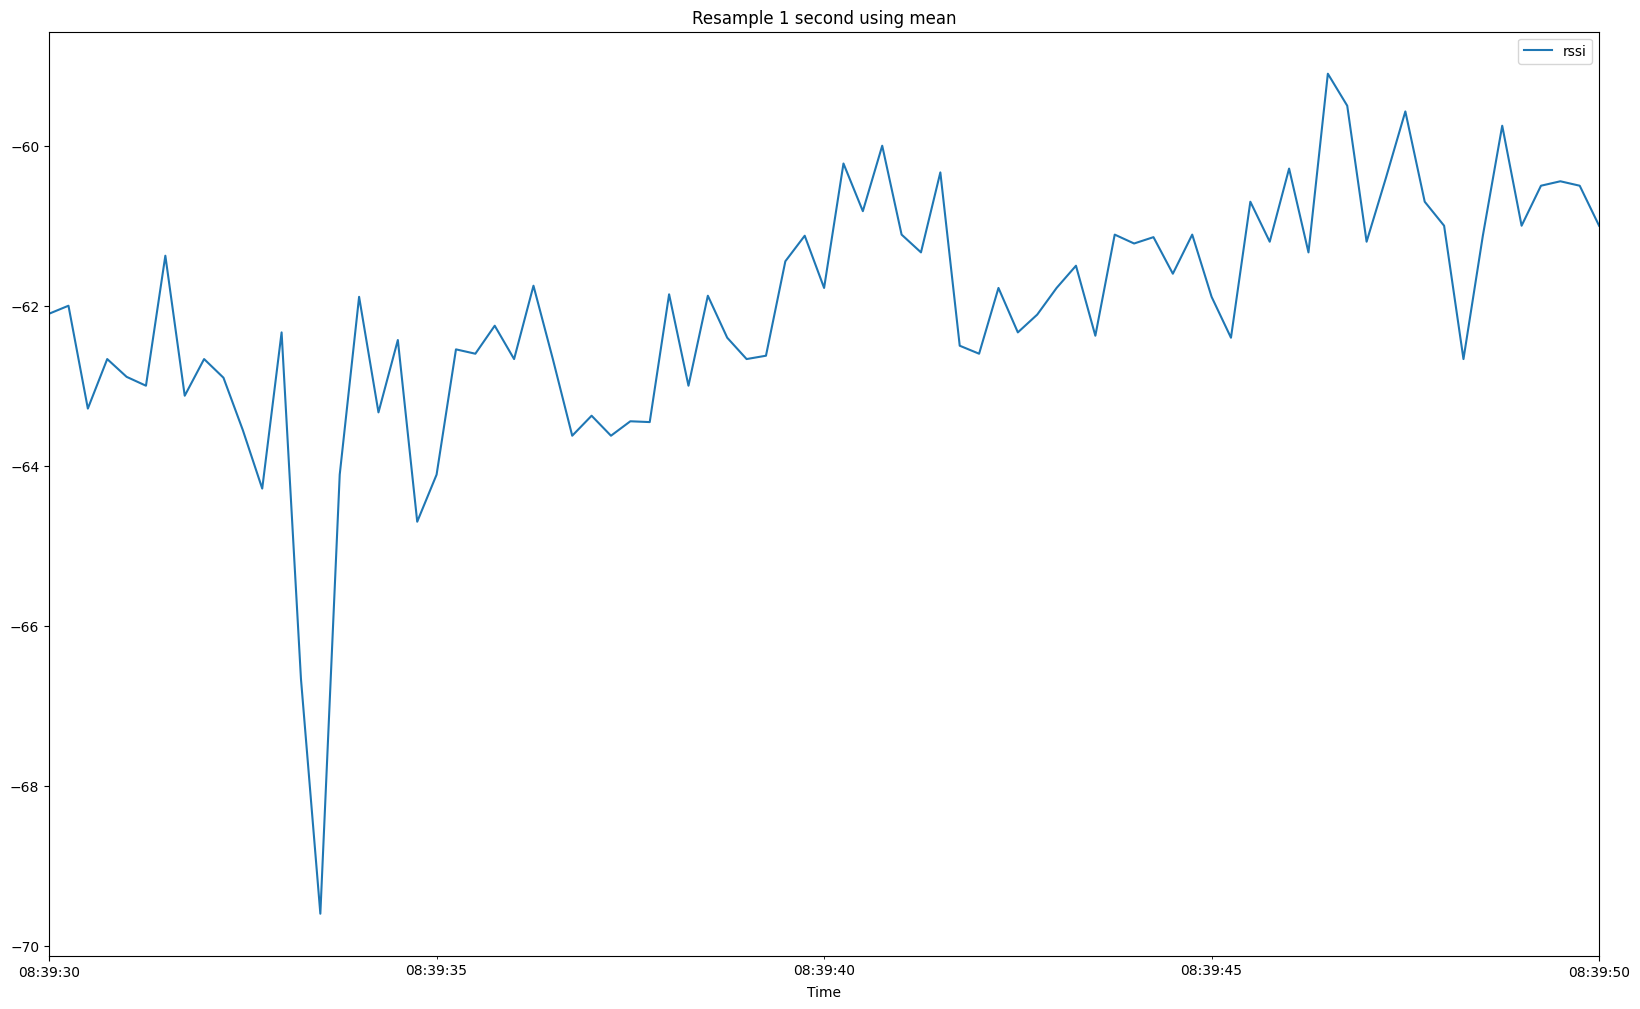

In [21]:
mean_df.plot(title='Resample 1 second using mean', figsize=(20, 12))

Line 1 shows the use of the resampling method to produce a new time series with a one-second frequency. The RSSI value of each interval is computed taking the medians over each second window.

<AxesSubplot:title={'center':'Resample 1 second using median'}, xlabel='Time'>

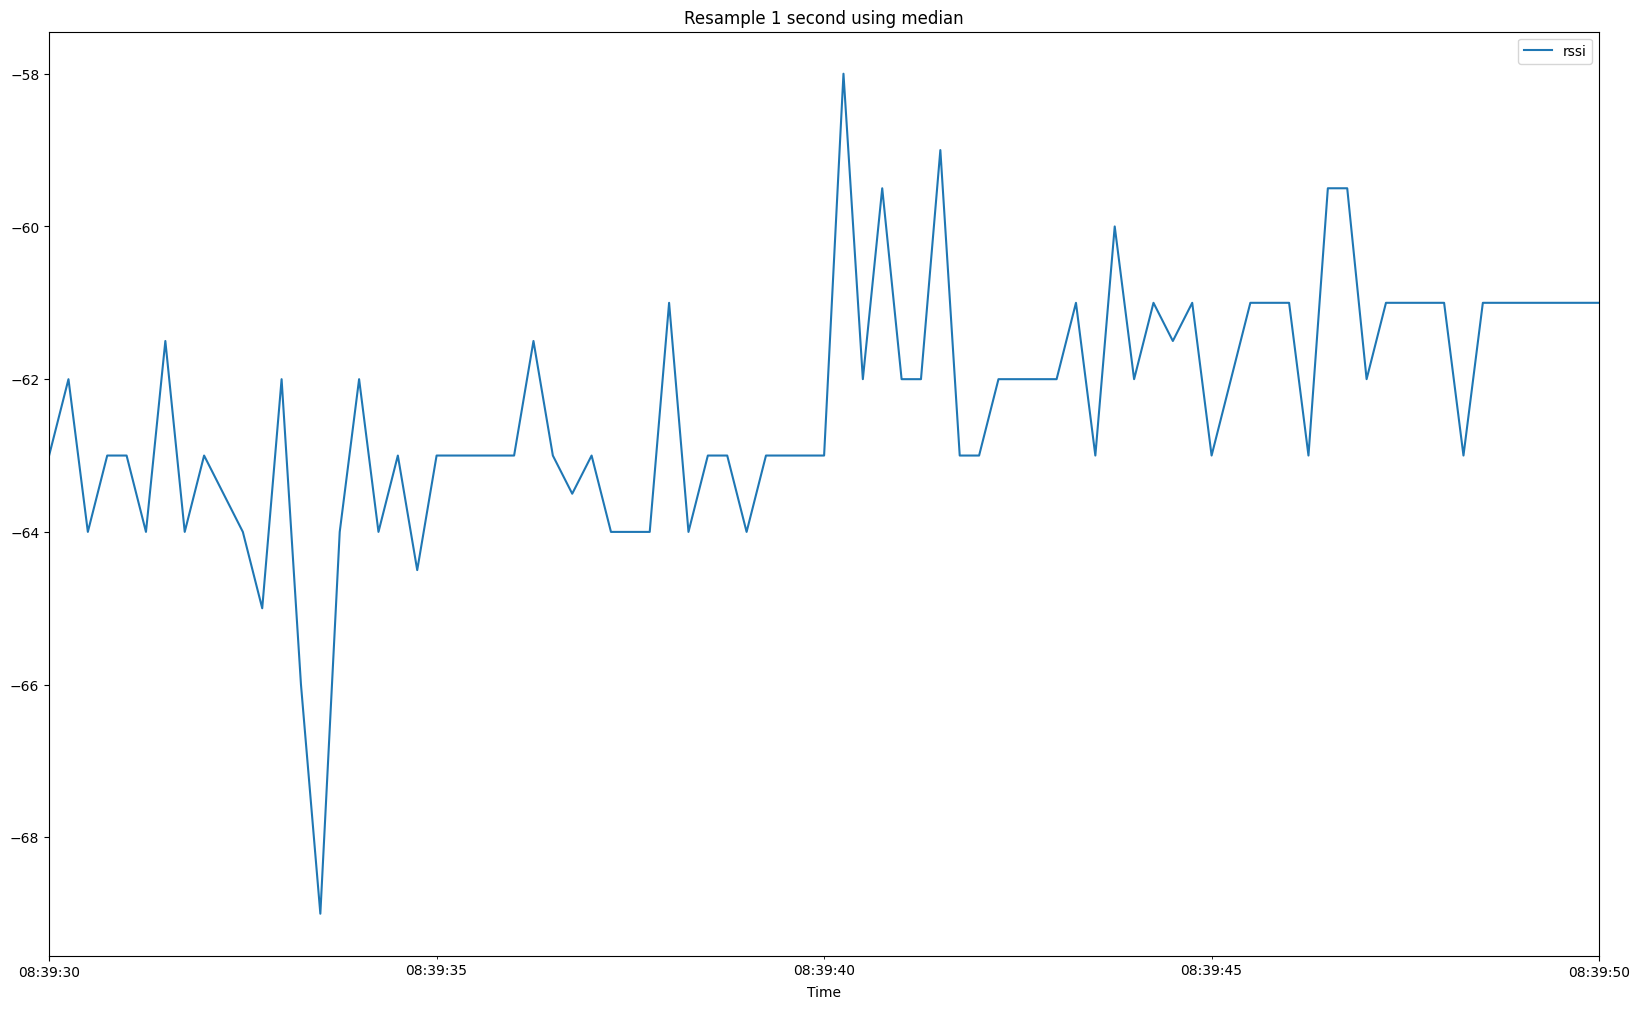

In [22]:
median_df = df.resample('0.25S', on='Time').median()
median_df.plot(title='Resample 1 second using median', figsize=(20, 12))

We compare the two downsampled data obtained using a line chart.

Text(0, 0.5, 'RSSI')

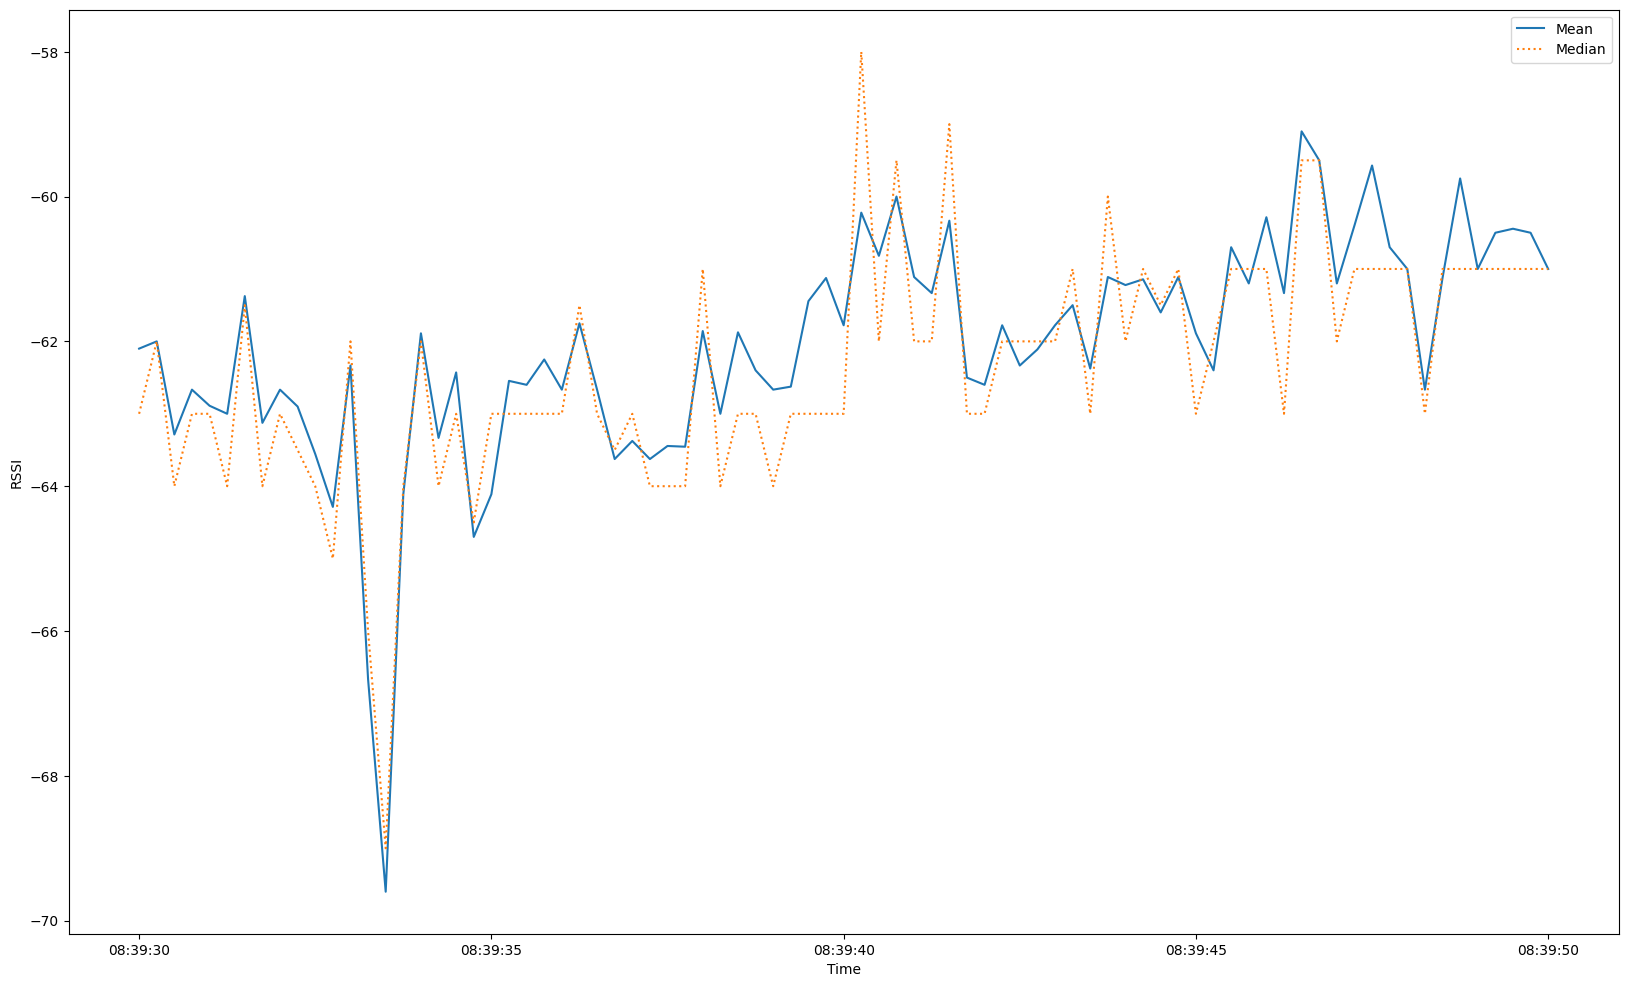

In [23]:
plt.figure(figsize=(20, 12))

plt.plot(mean_df['rssi'], label='Mean')
plt.plot(median_df['rssi'], linestyle='dotted',  label='Median')

plt.legend()
plt.xlabel('Time')
plt.ylabel('RSSI')

The comparison shows that using the mean as the aggregate function is more effective in reducing the interference. Specifically, the downsample based on the median still contains high-frequency noise.

### Results

Indoor localization applications usually require a precision that allows us to use both the onesecond and the two seconds frequency. However, for clarity purposes, we choose to use the two seconds frequency since it produces more readable graphs thanks to a data set with fewer rows.
Moreover, based on the results obtained, we decide to use the downsample applying the mean as the aggregate function.

In [10]:
mean_df

,rssi
Time,
2022-09-04 08:39:30.000,-62.250000
2022-09-04 08:39:30.200,-62.142857
2022-09-04 08:39:30.400,-61.857143
2022-09-04 08:39:30.600,-63.833333
2022-09-04 08:39:30.800,-62.428571
...,...
2022-09-04 08:39:49.200,-61.250000
2022-09-04 08:39:49.400,-59.833333
2022-09-04 08:39:49.600,-60.125000


Saving the downsampled dataframe into a *.csv* file.

In [24]:
mean_df.to_csv('../dataset/resample_mean_1.csv', index=True)